# Riset Pasar Video Game untuk Kampanye Iklan

Anda bekerja di toko daring "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Anda perlu mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak. Dengan begitu, Anda bisa menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.
Di depan Anda tersedia data dari tahun 2016. Mari bayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan Anda sedang merencanakan kampanye untuk tahun 2017.
(Saat ini, yang terpenting bagi Anda adalah untuk mendapatkan pengalaman bekerja dengan data. Tidak masalah apakah Anda meramalkan penjualan tahun 2017 berdasarkan data dari tahun 2016 atau meramalkan penjualan tahun 2027 berdasarkan data dari tahun 2026.).
Dataset ini memuat singkatan. ESRB merupakan singkatan dari Entertainment Software Rating Board, yakni sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

# Daftar Konten 

* [Pendahuluan](#Pendahuluan)
* [Inisialisasi](#Inisialisasi)
* [Memuat Data](#Memuat-Data)
* [Pra Pemrosesan Data](#Pra-Pemrosesan-Data)
* [Analisis Data Eksploratif](#Analisis-Data-Eksploratif)
* [Pemprofilan Berdasarkan Wilayah](#Pemprofilan-Berdasarkan-Wilayah)
* [Menguji Hipotesis Statistik](#Menguji-Hipotesis-Statistik)
* [Kesimpulan Umum](#Kesimpulan-Umum)

## Pendahuluan
Dalam proyek ini kita akan melakukan analisis terhadap penjualan video game dari tahun 2016. Selain berisi data-data tentang penjualan data tersebut juga berisi ulasan pengguna, kritikus, rating ganre, dan tentu saja nama game itu sendiri. Data tersebut juga berisi game yang rilis dari berbagai platform hingga tahun 2016. Diharapkan dari data- data tersebut kita dapat membuat riset yang bisa digunakan sebagai acuan utntuk kampanya penjualan video game pada tahun berikutnya.

### Tujuan
menguji hipotesis bahwa:   
<ol>    
    <li>Rata-rata rating pengguna platform Xbox One dan PC adalah sama.</li>
    <li>Rata-rata rating pengguna genre Action dan Sports berbeda.</li>
</ol>

### Tahapan 
Pertama kita akan memuat data dan mempelajari informasi umum yang ada pada dataset, kemudian melakukan pra-pemrosesan data seperti memeriksa missing values, duplikat dan mengganti tipe data. Kita juga dapat memperkaya kualitas data dengan mengolah data yang ada untuk mendapatkan data yang tepat untuk analisis dan jangan lupa mengecek anomali- anomali yang ada.

Kedua kita akan melakukan analisis data eksploratif dengan data-data yang sudah diolah terhadap variabel-variabel yang digunakan seperti genre, platform ataupun filter terhadap data itu sendiri.

Ketiga kita dapat menguji hipotesis nol kita secara statistik terhadap data yang sudah diolah. kemudian tidak lupa dengan kesimpulan umum mengenai proyek ini.

## Inisialisasi
Import library yang akan digunakan.

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from scipy import stats as st
import seaborn as sns

## Memuat Data

Buka file data dan pelajari informasi umumnya
File path:
/datasets/games.csv . Unduh dataset

In [2]:
# Muat file data ke dalam DataFrame yang berbeda
df_games = pd.read_csv('/datasets/games.csv')

## Pra Pemrosesan Data

Pada tahap pra pemrosesan data, kita akan mengekplorasi data kemudian memperbaiki dan menambha kualitas data.

### Mengekplorasi Data 

Mari kita mempelajari gambaran umum tentand data yang kita miliki.

In [3]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_name_counts = df_games['Name'].value_counts().reset_index()
df_name_counts.columns = ['Name', 'Value_Count']
df_name_counts

,Name,Value_Count
0,Need for Speed: Most Wanted,12
1,Madden NFL 07,9
2,Ratatouille,9
3,LEGO Marvel Super Heroes,9
4,FIFA 14,9
...,...,...
11554,Wrecking Crew,1
11555,Tom Clancy's Ghost Recon 2: Summit Strike,1
11556,Bomberman Land Touch! 2,1
11557,Super Robot Taisen Z Special Disc,1


In [5]:
df_games[df_games['Name'] == 'Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Ada beberapa nama video game yang sama, ternyata berasal dari platform yang berbeda dengan tahun rilis yang sama atau platform yang sama dengan tahun rilis yang berbeda atau platform yang berbeda dengan tahun rilis yang berbeda. Tapi tidak ada nama game dengan platform yang sama dan tahun rilis yang sama. Mungkin pabrikan game akan membuat versi remake atau dlc baru untuk sebuah video game minimal di tahun berikutnya, kecuali untuk rilis di platform yang berbeda.

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
df_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
df_games['Year_of_Release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64

Maksimum tahun rilis adalah 2016, sedangkan minimumnya 1980. Saya rasa gamer pada tahun 1980 tidak akan memiliki selera yang sama dengan tahun 2016.

In [10]:
df1 = df_games[df_games['Year_of_Release'] < 1990]
df1.isna().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
NA_sales             0
EU_sales             0
JP_sales             0
Other_sales          0
Critic_Score       203
User_Score         203
Rating             203
dtype: int64

In [11]:
df2 = df_games[(df_games['Year_of_Release'] > 1990) & (df_games['Year_of_Release'] < 2000)]
df2.isna().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       1661
User_Score         1656
Rating             1652
dtype: int64

In [12]:
df3 = df_games[(df_games['Year_of_Release'] > 2000) & (df_games['Year_of_Release'] < 2003)]
df3.isna().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
NA_sales             0
EU_sales             0
JP_sales             0
Other_sales          0
Critic_Score       358
User_Score         316
Rating             317
dtype: int64

In [13]:
df4 = df_games[(df_games['Year_of_Release'] > 2003) & (df_games['Year_of_Release'] < 2007)]
df4.isna().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
NA_sales             0
EU_sales             0
JP_sales             0
Other_sales          0
Critic_Score       871
User_Score         731
Rating             725
dtype: int64

In [14]:
df5 = df_games[(df_games['Year_of_Release'] > 2007) & (df_games['Year_of_Release'] < 2010)]
df5.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       1487
User_Score          847
Rating              861
dtype: int64

In [15]:
df6 = df_games[(df_games['Year_of_Release'] > 2010) & (df_games['Year_of_Release'] < 2013)]
df6.isna().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
NA_sales             0
EU_sales             0
JP_sales             0
Other_sales          0
Critic_Score       968
User_Score         708
Rating             731
dtype: int64

In [16]:
df7 = df_games[(df_games['Year_of_Release'] > 2013) & (df_games['Year_of_Release'] <= 2016)]
df7.isna().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
NA_sales             0
EU_sales             0
JP_sales             0
Other_sales          0
Critic_Score       971
User_Score         708
Rating             749
dtype: int64

In [17]:
df_games.duplicated().sum()

0

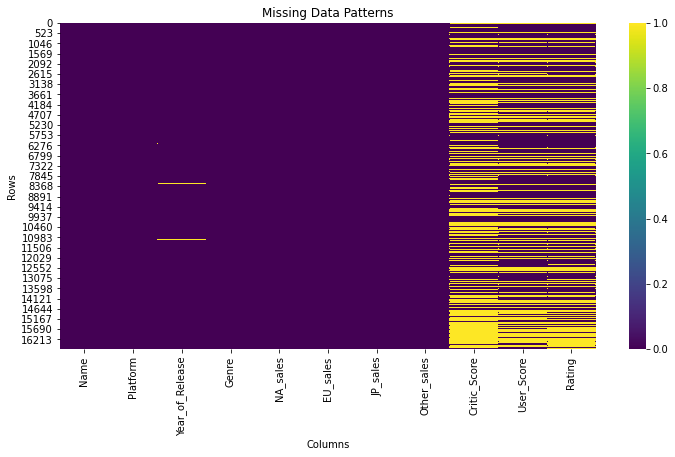

In [18]:
missing_data = df_games.isnull()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_data, cmap='viridis')

plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Data Patterns')
plt.show()

Ada beberapa nilai yang hilang dari beberapa kolom, dan tidak ada duplikat yang ditemukan. Tabel terdiri dari 6 kolom numerik dan 5 kategorik, yang sepertinya masih bisa disesuaikan dengan konten pada masing- masing kolom. Jika kita lihat sedikit polanya dengan heatmap, sepertinya ada beberapa game yang memiliki pola yang sama pada kolom critic_score, user_score, dan rating. Tidak banyak hal yang bisa didapatkan pada tahap awal ini.

### Memperbaiki Data

In [19]:
df_games = df_games.rename(columns=lambda x: x.lower())

Mari kita ekplorasi data kita lebih dalam dengan mengecek data pada setiap kolomnya.

In [20]:
df_games['name'].value_counts()

Need for Speed: Most Wanted                  12
Madden NFL 07                                 9
Ratatouille                                   9
LEGO Marvel Super Heroes                      9
FIFA 14                                       9
                                             ..
Wrecking Crew                                 1
Tom Clancy's Ghost Recon 2: Summit Strike     1
Bomberman Land Touch! 2                       1
Super Robot Taisen Z Special Disc             1
Thunderstrike: Operation Phoenix              1
Name: name, Length: 11559, dtype: int64

In [21]:
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [22]:
df_games = df_games[df_games['name'].notna()]

Ada kemungkinan platform GEN adalah sega genesys, tapi akan sulit mencari nama gamenya karena data yang ada hanya sedikit. Jadi mari kita drop saja untuk nilai yang hilang ini.

In [23]:
df_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [24]:
df_games['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [25]:
df_games['year_of_release'].isna().sum()

269

Kita akan mengganti nilai yang hilang pada year_of_release dengan nilai median berdasarkan nama gamenya, dan menghilangkan sisanya.

In [26]:
def fill_nan_median(df, agg_col, value_col) :
    grouped_values = df.groupby(agg_col)[value_col].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_col][i]
        value = grouped_values[value_col][i]
        df.loc[(df[agg_col] == group) & (df[value_col].isna()), value_col] = value
    return df

In [27]:
fill_nan_median(df_games, 'name', 'year_of_release')
dfyornull = df_games['year_of_release'].isna().sum()
dfyornull

146

In [28]:
f'Persentase nilai yang hilang sebesar {round((dfyornull / df_games.shape[0]) * 100, 2)}%'

'Persentase nilai yang hilang sebesar 0.87%'

In [29]:
df_games = df_games[df_games['year_of_release'].notna()]

In [30]:
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

In [31]:
df_games['genre'].value_counts()

Action          3342
Sports          2333
Misc            1735
Role-Playing    1484
Shooter         1311
Adventure       1294
Racing          1236
Platform         879
Simulation       860
Fighting         842
Strategy         678
Puzzle           573
Name: genre, dtype: int64

In [32]:
df_games['genre'].isna().sum()

0

Nilai yang hilang pada genre sama dengan pada kolom name.

In [33]:
df_games['critic_score'].value_counts()

70.0    253
71.0    252
75.0    243
78.0    238
80.0    236
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

In [34]:
df_games['critic_score'].isna().sum()

8492

In [35]:
fill_nan_median(df_games, 'name', 'critic_score')
dfcsnull = df_games['critic_score'].isna().sum()
dfcsnull

7532

In [36]:
f'Persentase nilai yang hilang sebesar {round((dfcsnull / df_games.shape[0]) * 100, 2)}%'

'Persentase nilai yang hilang sebesar 45.46%'

In [37]:
df_games['critic_score'].isna().sum()

7532

In [38]:
df_games['user_score'].value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
2.3       2
0.5       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [39]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

In [40]:
df_games['user_score'] = df_games['user_score'].astype(float)

In [41]:
df_games['user_score'].isna().sum()

9027

In [42]:
fill_nan_median(df_games, 'name', 'user_score')
dfusnull = df_games['user_score'].isna().sum()
dfusnull

7928

In [43]:
f'Persentase nilai yang hilang sebesar {round((dfusnull / df_games.shape[0]) * 100, 2)}%'

'Persentase nilai yang hilang sebesar 47.85%'

In [44]:
df_games['user_score'].isna().sum()

7928

In [45]:
df_games['rating'].value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

In [46]:
def fill_nan_mode(df, agg_col, value_col):
    grouped_values = df.groupby(agg_col)[value_col].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()
    
    for i, row in grouped_values.iterrows():
        group = row[agg_col]
        value = row[value_col]
        df.loc[(df[agg_col] == group) & (df[value_col].isna()), value_col] = value
    
    return df

In [47]:
df_games.groupby('name')['rating'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

name
 Beyblade Burst                 NaN
 Fire Emblem Fates              NaN
 Frozen: Olaf's Quest           NaN
 Haikyu!! Cross Team Match!     NaN
 Tales of Xillia 2                T
                               ... 
thinkSMART FAMILY!                E
thinkSMART: Chess for Kids        E
uDraw Studio                      E
uDraw Studio: Instant Artist      E
¡Shin Chan Flipa en colores!    NaN
Name: rating, Length: 11426, dtype: object

In [48]:
df_games['rating'].isna().sum()

6699

In [49]:
fill_nan_mode(df_games, 'name', 'rating')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [50]:
dfrtnull = df_games['rating'].isna().sum()

In [51]:
f'Persentase nilai yang hilang sebesar {round((dfrtnull / df_games.shape[0]) * 100, 2)}%'

'Persentase nilai yang hilang sebesar 37.8%'

In [52]:
df_games['rating'].isna().sum()

6262

Pada kolom critic_score, user_score, dan rating, nilai yang hilang diisi dengan data dari nama game yang sama. Akan tetapi terlihat persentase nilai yang hilangnya masih lumayan tinggi. Karena kolom critic_score, user_score, dan rating tidak memiliki referensi data yang cukup untuk mengisinya. Jika data tersebut diisi dengan mean atau median score, genre ataupun rating paling banyak secara umum, sepertinya akan membuat nilai tersebut menjadi bias karena bisa saja satu game memiliki rata- rata yang berbeda dalam satu platform dan genre.

In [53]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [54]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       8639 non-null   float64
 10  rating           10305 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [55]:
df_games.dropna(inplace=True)

Diputuskan untuk mendrop nilai yang hilang karena data yang ada diasumsikan tidak dapat mengisi nilai yang hilang secara representatif.

In [56]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8249 entries, 0 to 16706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8249 non-null   object 
 1   platform         8249 non-null   object 
 2   year_of_release  8249 non-null   int64  
 3   genre            8249 non-null   object 
 4   na_sales         8249 non-null   float64
 5   eu_sales         8249 non-null   float64
 6   jp_sales         8249 non-null   float64
 7   other_sales      8249 non-null   float64
 8   critic_score     8249 non-null   float64
 9   user_score       8249 non-null   float64
 10  rating           8249 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 773.3+ KB


### Memperkaya Kualitas Data

In [57]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] +df_games['other_sales']

In [58]:
df_games.groupby(['name', 'platform', 'year_of_release'])['total_sales'].sum()

name                          platform  year_of_release
 Tales of Xillia 2            PS3       2012               0.84
.hack//Infection Part 1       PS2       2002               1.26
.hack//Mutation Part 2        PS2       2002               0.67
.hack//Outbreak Part 3        PS2       2002               0.46
007 Racing                    PS        2000               0.53
                                                           ... 
pro evolution soccer 2011     PSP       2010               0.80
                              Wii       2010               0.22
                              X360      2010               0.60
uDraw Studio: Instant Artist  Wii       2011               0.17
                              X360      2011               0.02
Name: total_sales, Length: 8247, dtype: float64

In [59]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


## Analisis Data Eksploratif

Pada tahap ini kita akan meninjau beberapa variabel dan mengagregasikan data untuk mendapatkan gambaran- gambaran baru terhadap kesimpulan yang dicari.

In [60]:
# Function untuk barchart

def bar_plan_comparison(df, x, y, hue, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x, y=y, hue=hue, data=df, palette='Set2', linewidth=1.5)

    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.title(title, fontsize=14)

    plt.grid(axis='y', linestyle='--')
    plt.xticks(rotation=45, ha='right')
    sns.set_style("whitegrid")
    plt.show()

In [62]:
# Function untuk boxplot

def boxplot_plan_comparison(df, x, y, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=x, y=y, data=df, palette='Set2')
    mean_val = df.groupby(x)[y].mean()
    plt.plot(mean_val.index, mean_val.values, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.title(title, fontsize=14)
    sns.set_style("whitegrid")
    plt.legend()
    plt.show()

In [63]:
df_yor = df_games.groupby('year_of_release').agg({'name':'count'}).reset_index()
df_yor

,year_of_release,name
0,1980,1
1,1981,1
2,1982,1
3,1985,2
4,1988,1
5,1989,1
6,1990,1
7,1991,4
8,1992,6
9,1994,15


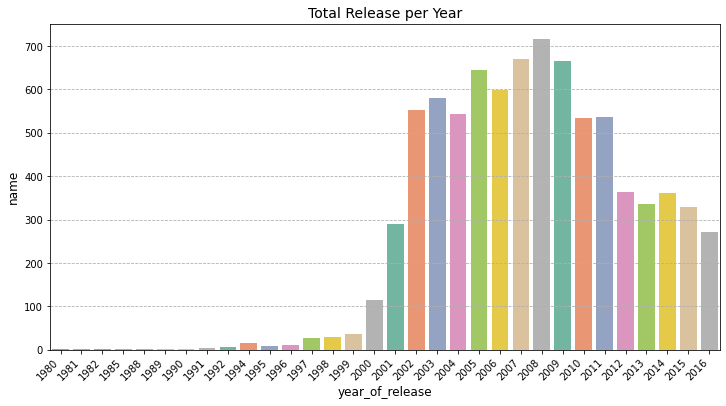

In [64]:
bar_plan_comparison(df_yor, x='year_of_release', y='name', hue=None, title='Total Release per Year')

Penjualan video game mulai populer pada tahun 1995 hingga 1996, dimana perkembangannya cukup signifikan. Pada tahun 2000 - 2001 terlihat penjualan video game berkembang cukup tinggi.

In [65]:
df_platform = df_games.groupby('platform').agg({'total_sales':'sum'}).reset_index().sort_values(by='total_sales')
df_platform

,platform,total_sales
17,SAT,1.49
0,2600,2.60
4,GB,5.33
2,DC,6.45
9,NES,6.60
7,GEN,9.05
8,N64,12.13
18,SNES,28.13
16,PSV,37.78
20,WiiU,71.39


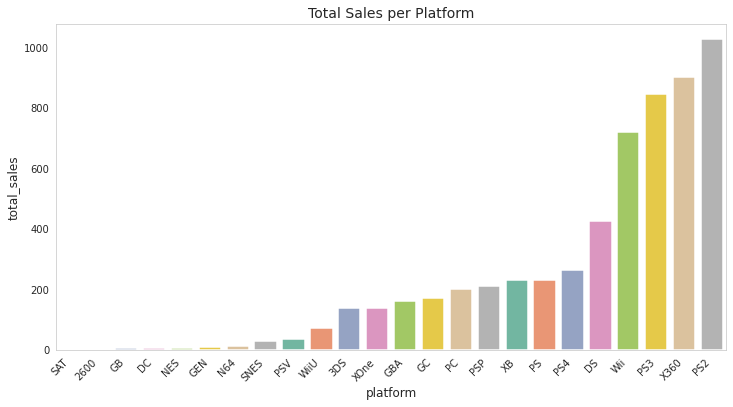

In [66]:
bar_plan_comparison(df_platform, x='platform', y='total_sales', hue=None, title='Total Sales per Platform')

Walaupun bukan platform paling baru di pasaran, terlihat PS2 menjadi platform dengan penjualan tertinggi disusul X360, PS3, Wii, DS, dan PS4.

In [67]:
df_platform_top = df_games[df_games['platform'] == 'PS2'].groupby('year_of_release').agg({'total_sales':'sum'}).reset_index().sort_values(by='total_sales')
df_platform_top

,year_of_release,total_sales
11,2011,0.34
10,2010,4.51
9,2009,17.94
0,2000,29.89
8,2008,36.61
7,2007,55.24
6,2006,76.81
5,2005,127.01
1,2001,148.85
3,2003,160.30


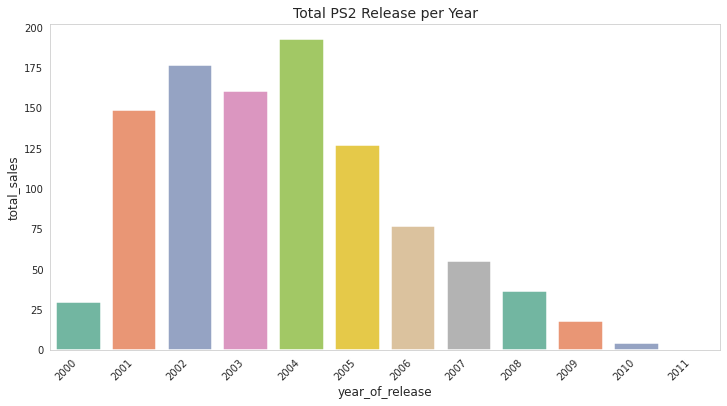

In [68]:
bar_plan_comparison(df_platform_top, x='year_of_release', y='total_sales', hue=None, title='Total PS2 Release per Year')

Tercatat penjualan video game PS2 tertinggi pada tahum 2004 dengan penjualan hampir 200 juta usd. Menariknya ternyata pada tahun 2008 dimana penjualan video game mencapai titik tertingginya, platform PS2 sudah mencapai masa- masa terakhirnya, dapat dikatakan umurnya hanya sekitar 10 tahun.

In [69]:
df_platform_all = df_games.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
df_platform_all

,platform,year_of_release,total_sales
0,2600,1980,1.05
1,2600,1981,0.93
2,2600,1982,0.62
3,3DS,2010,0.30
4,3DS,2011,46.97
...,...,...,...
174,XB,2008,0.18
175,XOne,2013,18.52
176,XOne,2014,49.29
177,XOne,2015,45.86


In [70]:
df_platform_all[df_platform_all['total_sales'] < 5].sort_values(by='total_sales')

,platform,year_of_release,total_sales
55,PC,1995,0.02
52,PC,1988,0.03
51,PC,1985,0.04
132,SAT,1996,0.05
124,PSP,2014,0.05
...,...,...,...
114,PSP,2004,4.46
96,PS2,2010,4.51
76,PC,2016,4.69
40,GEN,1992,4.72


In [71]:
df_platform_all['year_of_release'] = df_platform_all['year_of_release'].astype(str)
df_platform_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         179 non-null    object 
 1   year_of_release  179 non-null    object 
 2   total_sales      179 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


In [72]:
df_platform_all['year_of_release'] = pd.to_numeric(df_platform_all['year_of_release'])

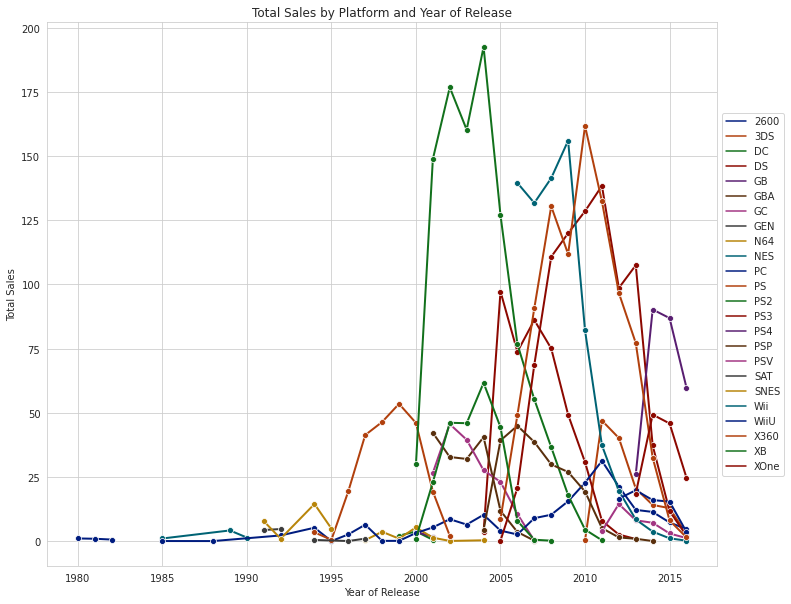

In [73]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a line plot with hue and custom color range
sns.lineplot(data=df_platform_all, x='year_of_release', y='total_sales', hue='platform', linewidth=2, marker='o', palette='dark')

# Set axis labels and title
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.title('Total Sales by Platform and Year of Release')

# Adjust legend position
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Show the plot
plt.show()

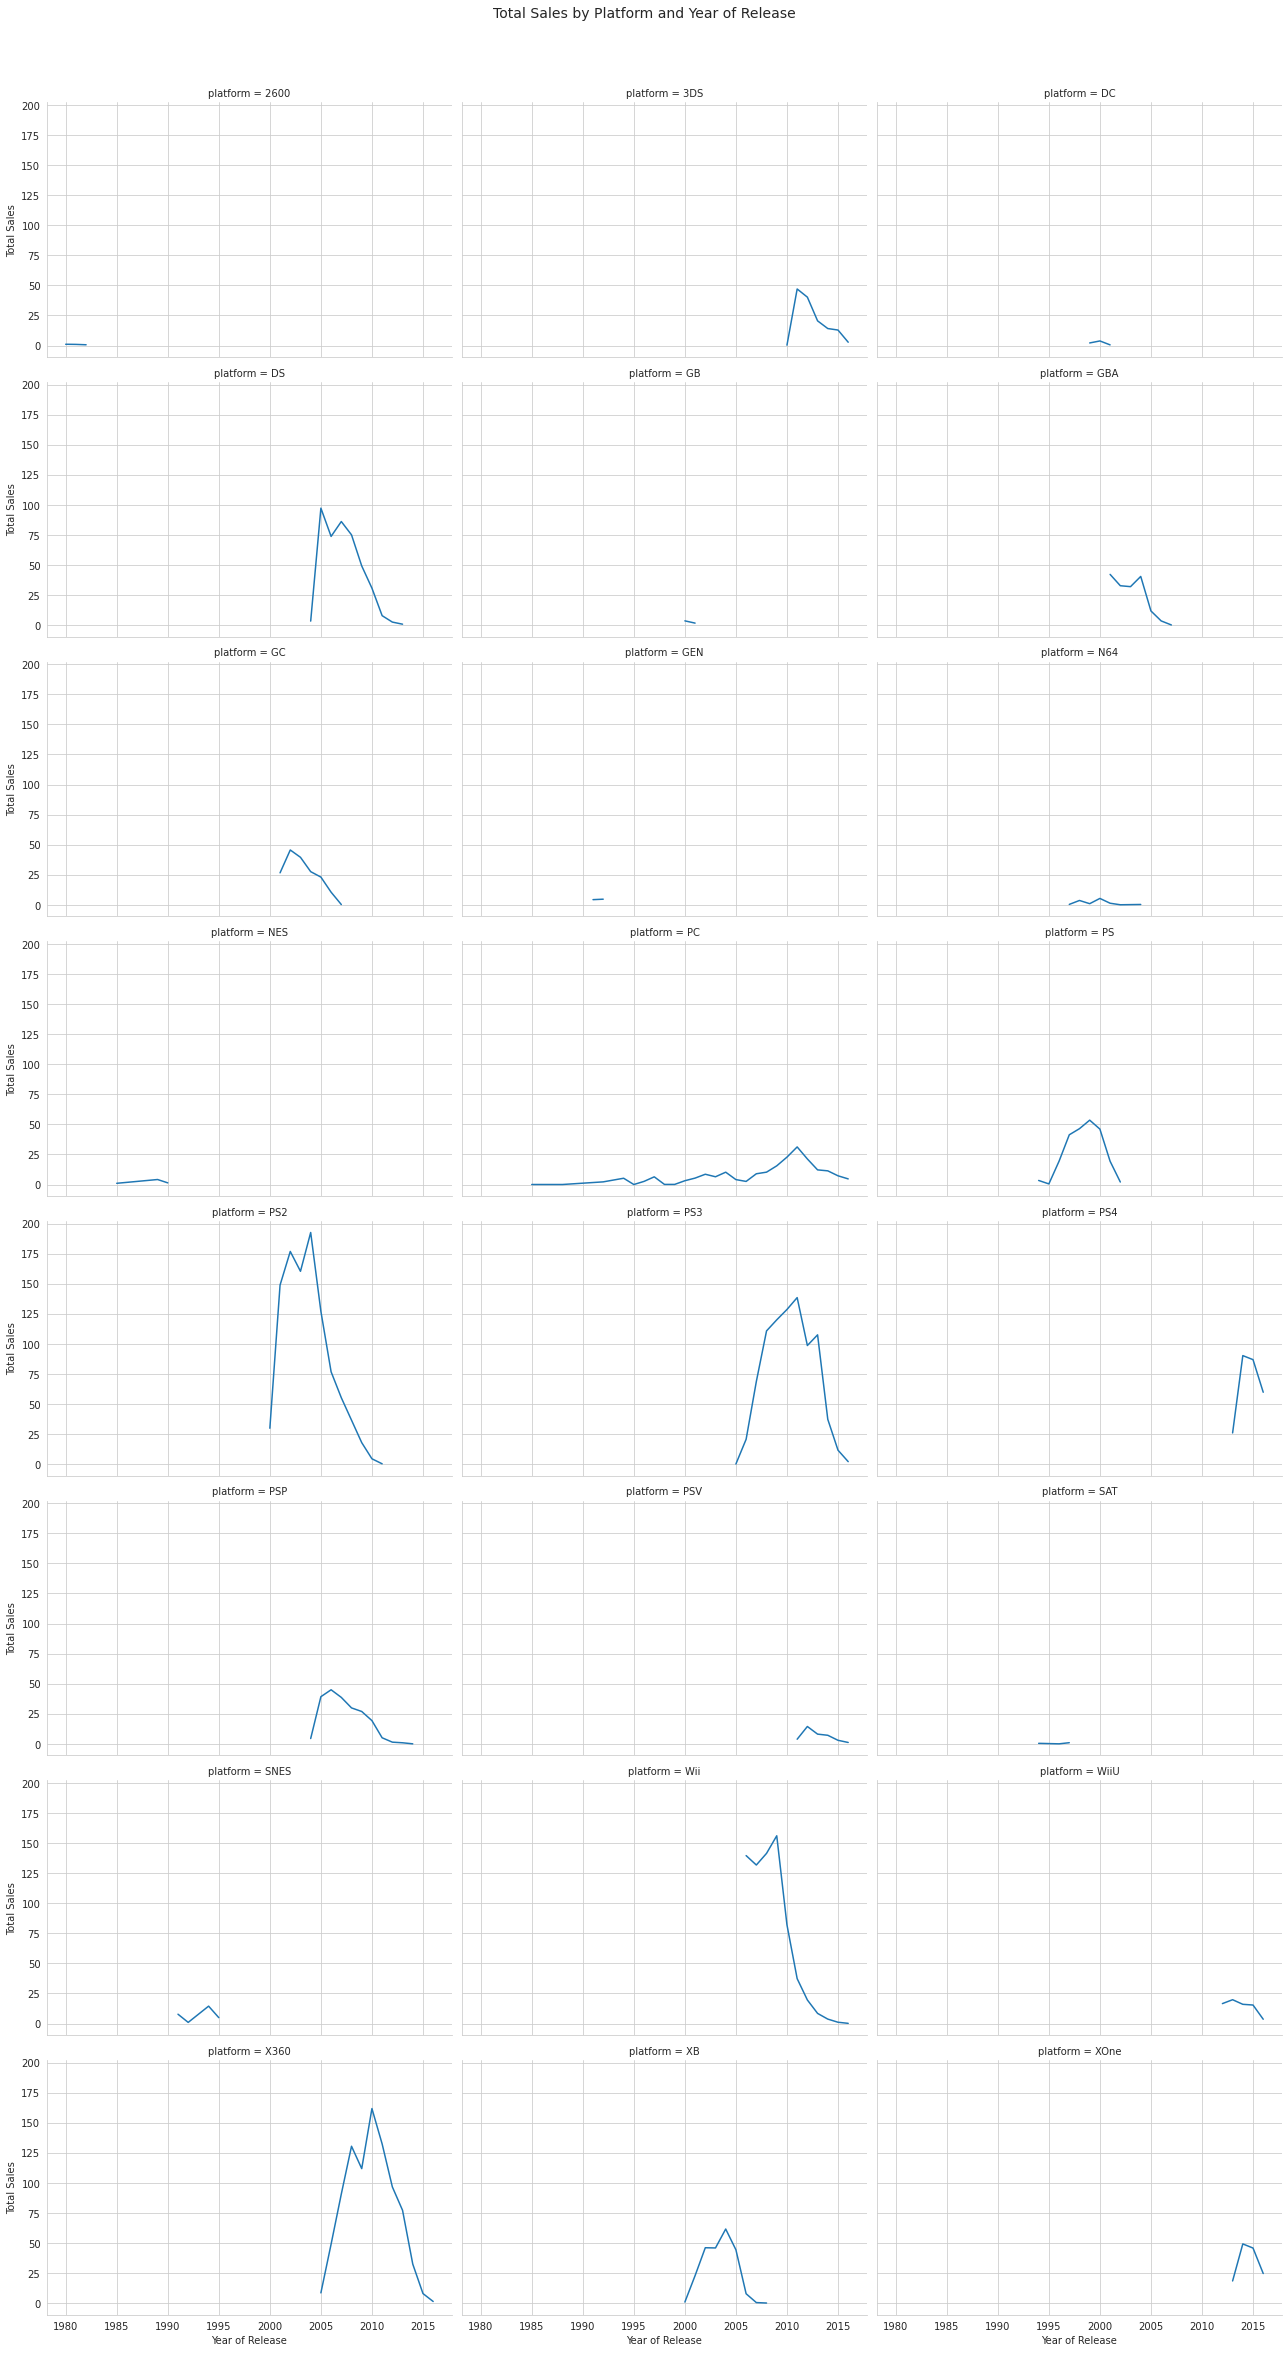

In [74]:
g = sns.FacetGrid(df_platform_all, col='platform', col_wrap=3, height=4, aspect=1.5)

# Map line plots to each facet
g.map(sns.lineplot, 'year_of_release', 'total_sales')

# Set axis labels and titles
g.set_axis_labels('Year of Release', 'Total Sales')
g.fig.suptitle('Total Sales by Platform and Year of Release', fontsize=14, y=1.02)

# Adjust plot aesthetics
sns.set_style("whitegrid")
plt.tight_layout()

# Show the plot
plt.show()

Jika kita meringkas dari grafik diatas dapat diketahui beberapa platform dengan angka penjualan pernah menyentuh 100 juta usd:
- Wii
- PS2
- PS3
- PS4
- X360

Dari semua nama platform tersebut dimiliki oleh 3 nama brand besar yaitu playstation, xbox, dan nintendo.

Platform seperti PS, PS2 dan DS pernah memiliki masa kejayaannya sendiri walaupun sekarang tidak memiliki penjualan apa pun. Pada umumnya untuk platform populer dengan penjualan diatas 100 juta usd bertahan sekitar 10 tahun dan untuk penjualan sekitar 50 juta usd sekitar 5 tahun. Karena kita akan menggunakan acuan untuk tahun berikutnya, data yang akan digunakan adalah data dari tahun 2010 hingga 2015, karena masih termasuk dalam siklus 5 tahun pergantian popularitas platform video game dan untuk Xone dan PS4 sepertinya harus menjadi perhation khusus karena termasuk platform nextgen yang rilis akhir tahun 2013. Dan data untuk game yang rilis tahun 2016 tidak digunakan karena dinilai kurang representatif. 

In [75]:
df_platform_all

,platform,year_of_release,total_sales
0,2600,1980,1.05
1,2600,1981,0.93
2,2600,1982,0.62
3,3DS,2010,0.30
4,3DS,2011,46.97
...,...,...,...
174,XB,2008,0.18
175,XOne,2013,18.52
176,XOne,2014,49.29
177,XOne,2015,45.86


In [76]:
df_games_2 = df_platform_all.query('year_of_release >= 2010 & (year_of_release < 2016) ')
df_games_2.sample(5)

,platform,year_of_release,total_sales
127,PSV,2013,8.11
22,DS,2013,0.83
150,WiiU,2013,19.82
177,XOne,2015,45.86
4,3DS,2011,46.97


In [77]:
df_games_2['platform'].unique()

array(['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii',
       'WiiU', 'X360', 'XOne'], dtype=object)

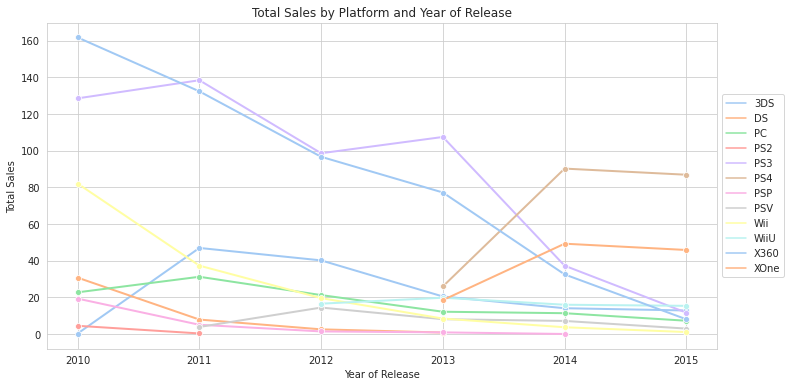

In [78]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a line plot with hue and custom color range
sns.lineplot(data=df_games_2, x='year_of_release', y='total_sales', hue='platform', linewidth=2, marker='o', palette='pastel')

# Set axis labels and title
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.title('Total Sales by Platform and Year of Release')

# Adjust legend position
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Show the plot
plt.show()

Pada tahun 2010- 2013 PS3 dan X360 bergantian menguasai pasar video game, dengan X360 memimpin pada 2010 dan PS3 memimpin pada 2011, 2012, dan 2013. Akan tetapi dengan kehadiran platform barupopularitas platform lama pun semakin berkurang. Platform baru seperti PS4 dan XOne memiliki grafik yang meningkat, sementara platform lain grafiknya menurun. Tentunya untuk platform yang grafiknya terus meningkat lebih berpotensi untuk penjualan kedepannya.

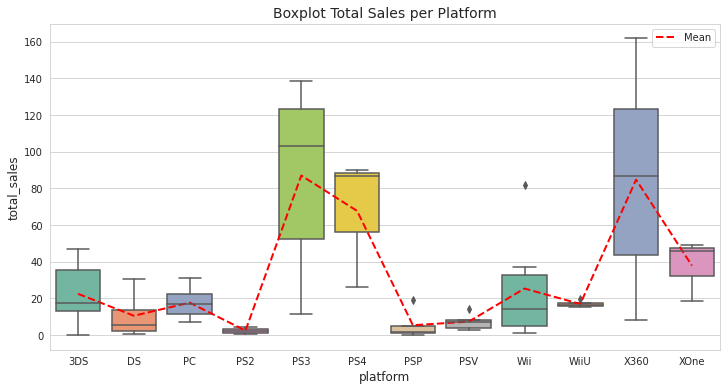

In [79]:
boxplot_plan_comparison(df_games_2, 'platform', 'total_sales', 'Boxplot Total Sales per Platform')

Pada data tahun 2010-2015 ini ada beberapa platform yang penjualannya tidak terlalu signifikan seperti PS2 yang sudah tergantikan oleh PS3 dan PS4. Terlihat X360 memiliki penjualan tertinggi, diikuti dengan PS3. Platform lainnya memiliki penjualan yang tidak terlalu bagus hingga akhir 2015 dengan tren penjualan yang terus menurun tentu memiliki rata- rata yang lebih rendah. Yang cukup menarik adalah platform 3DS yang ternyata memiliki statistik yang cukup bagus dan persebarannya cukup merata pertahunnya. untuk platform PS4 dan XOne ternyata memiliki total yang cukup jauh sekitar 1 berbanding dua dengan PS4 unggul dalam penjualan. 

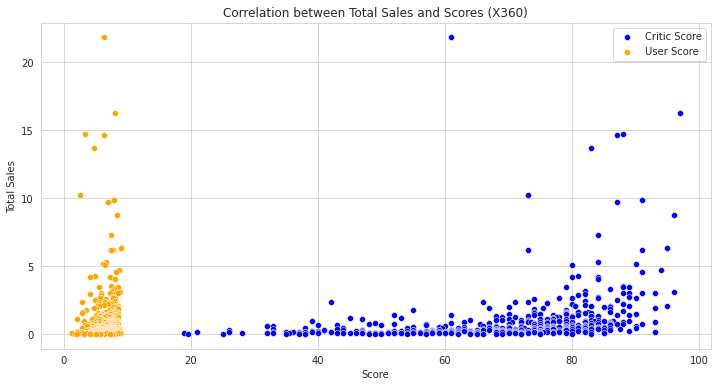

In [80]:
df_x360 = df_games[(df_games['platform'] == 'X360') & (df_games['year_of_release'] >= 2010) & (df_games['year_of_release'] < 2016)]
df_x360 = df_x360.dropna(subset=['critic_score', 'user_score'])
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_x360, x='critic_score', y='total_sales', color='blue', label='Critic Score')
sns.scatterplot(data=df_x360, x='user_score', y='total_sales', color='orange', label='User Score')

plt.xlabel('Score')
plt.ylabel('Total Sales')
plt.title('Correlation between Total Sales and Scores (X360)')
plt.legend()
plt.show()

In [81]:
df_x360.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.082064,-0.049230,-0.162495,-0.068268,0.098944,-0.161294,-0.074639
na_sales,-0.082064,1.000000,0.863215,0.727476,0.965875,0.301340,0.041440,0.985496
eu_sales,-0.049230,0.863215,1.000000,0.680900,0.956397,0.338094,0.058673,0.936203
jp_sales,-0.162495,0.727476,0.680900,1.000000,0.732236,0.251334,0.128936,0.739597
other_sales,-0.068268,0.965875,0.956397,0.732236,1.000000,0.334888,0.052758,0.993732
critic_score,0.098944,0.301340,0.338094,0.251334,0.334888,1.000000,0.521034,0.323819
user_score,-0.161294,0.041440,0.058673,0.128936,0.052758,0.521034,1.000000,0.049601
total_sales,-0.074639,0.985496,0.936203,0.739597,0.993732,0.323819,0.049601,1.000000


Platform X360 dapat dikatakan sebagai platform dengan kinerja terbaik selama periode 2010- 2015, mari kita lakukan pengecekan apakah penjualannya dipengaruhi pleh ulasan dari pengguna dan kritikus game.

Dari grafik diatas kita dapat menyimpulkan bahwa pengaruh dari critic_score dan user_score terhadap penjualan video game X360 sangat tidak signifikan, kemungkinan penjualannya lebih dipengaruhi oleh popularitas game itu sendiri.

In [82]:
df_name_counts

,Name,Value_Count
0,Need for Speed: Most Wanted,12
1,Madden NFL 07,9
2,Ratatouille,9
3,LEGO Marvel Super Heroes,9
4,FIFA 14,9
...,...,...
11554,Wrecking Crew,1
11555,Tom Clancy's Ghost Recon 2: Summit Strike,1
11556,Bomberman Land Touch! 2,1
11557,Super Robot Taisen Z Special Disc,1


In [83]:
df_filter = df_name_counts[df_name_counts['Value_Count'] > 3]

In [84]:
df_games_3 = df_games[(df_games['name'].isin(df_filter['Name'])) & (df_games['year_of_release'] >= 2010) & (df_games['year_of_release'] < 2016)].groupby(['name', 'platform']).agg({'total_sales':'sum'}).reset_index()
df_games_3 = df_games_3[df_games_3['total_sales'] > 5]
df_games_3

,name,platform,total_sales
18,Assassin's Creed III,PS3,6.44
20,Assassin's Creed III,X360,5.29
33,Batman: Arkham City,PS3,5.48
86,Call of Duty: Advanced Warfare,PS4,7.66
88,Call of Duty: Advanced Warfare,XOne,5.26
91,Call of Duty: Black Ops,PS3,12.63
93,Call of Duty: Black Ops,X360,14.62
95,Call of Duty: Black Ops II,PS3,13.79
97,Call of Duty: Black Ops II,X360,13.68
99,Call of Duty: Ghosts,PS3,9.36


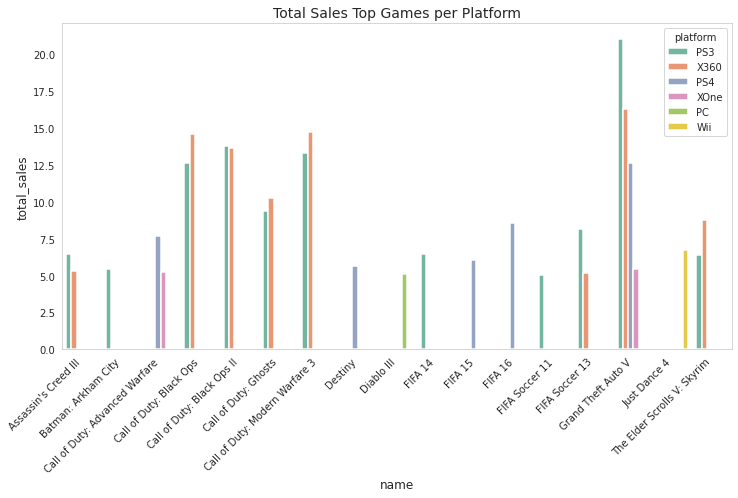

In [85]:
bar_plan_comparison(df_games_3, x='name', y='total_sales', hue='platform', title='Total Sales Top Games per Platform')

DAri tabel diataskita dapat melihat GTA V menjadi game dengan penjualan tertinggi dengan platform tertingginya PS3. Untuk X360 mayoritas adalah Call of Duty yang bergenre fps atau shooter. 

In [86]:
df_games_4 = df_games[(df_games['year_of_release'] >= 2010) & (df_games['year_of_release'] < 2016)].groupby(['platform', 'name', 'genre']).agg({'total_sales':'sum'}).reset_index()
df_games_4 = df_games_4[df_games_4['total_sales'] > 5]
df_games_4

,platform,name,genre,total_sales
6,3DS,Animal Crossing: New Leaf,Simulation,9.17
81,3DS,Mario Kart 7,Racing,12.65
92,3DS,New Super Mario Bros. 2,Platform,9.90
150,3DS,Super Mario 3D Land,Platform,10.81
343,PC,Diablo III,Role-Playing,5.14
614,PS3,Assassin's Creed III,Action,6.44
625,PS3,Batman: Arkham City,Action,5.48
629,PS3,Battlefield 3,Shooter,7.17
659,PS3,Call of Duty: Black Ops,Shooter,12.63
660,PS3,Call of Duty: Black Ops II,Shooter,13.79


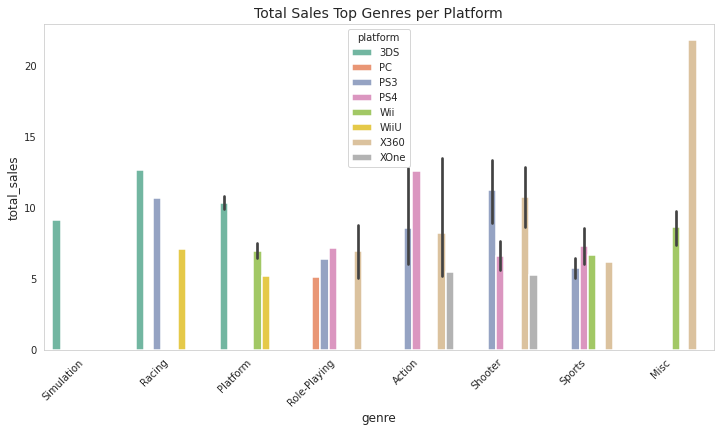

In [87]:
bar_plan_comparison(df_games_4, x='genre', y='total_sales', hue='platform', title='Total Sales Top Genres per Platform')

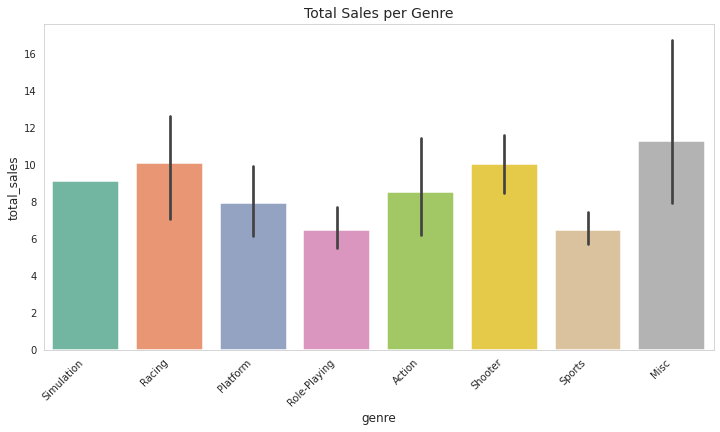

In [88]:
bar_plan_comparison(df_games_4, x='genre', y='total_sales', hue=None, title='Total Sales per Genre')

Video game dengan genre Role-Playing memiliki persebaran atar platform lebih baik dibandingkan yang lainnya, diikuti genre Shooter, dan Sport. Genre Misc tanpa terduga memiliki penjualan tertinggi dengan platform X360nya. Secara umum genre populer terdiri dari Misc, Shooter, dan Racing yang lebih mengacu adrenalin saat memainkannya. Secara keseluruhan perbedaan penjualan total antar genre tidak begitu signifikan, hanya saja beberapa genre lebih cenderung terhadap platform tertentu.

## Pemprofilan Berdasarkan Wilayah

Mari kita lakukan analisis berdasarkan wilayah penjualannya.

In [89]:
df_games_5 = df_games[(df_games['year_of_release'] >= 2010) & (df_games['year_of_release'] < 2016)]

In [90]:
df_na = df_games_5.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
df_na.head()

,na_sales
platform,
X360,310.46
PS3,209.50
Wii,80.37
PS4,72.14
XOne,67.42


In [91]:
df_eu = df_games_5.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
df_eu.head()

,eu_sales
platform,
PS3,192.18
X360,150.21
PS4,91.74
PC,57.67
Wii,49.12


In [92]:
df_jp = df_games_5.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
df_jp.head()

,jp_sales
platform,
PS3,43.03
3DS,36.75
WiiU,10.16
Wii,9.87
PSV,9.15


In [93]:
df_other = df_games_5.pivot_table(index='platform',values='other_sales',aggfunc='sum').sort_values(by='other_sales',ascending=False)
df_other.head()

,other_sales
platform,
PS3,77.38
X360,43.67
PS4,31.67
Wii,12.90
PC,12.56


X360 menjadi platform dengan penjualan tertinggi di North America, sementara di wilayah lainnya PS3 menjadi platform dengan penjualan tertinggi.

In [94]:
df_na = df_games_5.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
df_na.head()

,na_sales
genre,
Action,253.53
Shooter,200.41
Sports,130.43
Role-Playing,81.06
Misc,78.65


In [95]:
df_eu = df_games_5.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
df_eu.head()

,eu_sales
genre,
Action,206.11
Shooter,139.34
Sports,87.28
Role-Playing,53.85
Racing,44.97


In [96]:
df_jp = df_games_5.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
df_jp.head()

,jp_sales
genre,
Role-Playing,35.72
Action,34.70
Platform,14.11
Shooter,11.46
Misc,9.32


In [97]:
df_other = df_games_5.pivot_table(index='genre',values='other_sales',aggfunc='sum').sort_values(by='other_sales',ascending=False)
df_other.head()

,other_sales
genre,
Action,67.88
Shooter,45.99
Sports,30.94
Role-Playing,18.52
Racing,12.62


Genre action mencatatkan angka penjualan tertinggi pada wilayah North America, Europe Union, dan wilayah lainnya , sementara jepang didominasi genre role-playing.

In [98]:
df_na = df_games_5.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
df_na.head()

,na_sales
rating,
M,376.16
E,226.27
E10+,150.58
T,149.89
RP,0.00


In [99]:
df_eu = df_games_5.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
df_eu.head()

,eu_sales
rating,
M,287.48
E,175.16
T,104.96
E10+,97.26
RP,0.03


In [100]:
df_jp = df_games_5.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
df_jp.head()

,jp_sales
rating,
E,47.57
T,44.57
M,30.72
E10+,12.94
RP,0.00


In [101]:
df_other = df_games_5.pivot_table(index='rating',values='other_sales',aggfunc='sum').sort_values(by='other_sales',ascending=False)
df_other.head()

,other_sales
rating,
M,95.61
E,53.23
T,36.35
E10+,30.17
RP,0.01


Rating M (mature) mencatatkan angka penjualan tertinggi pada wilayah North America, Europe Union, dan wilayah lainnya , sementara jepang didominasi rating E (Everyone).

Diketahui bahwa action menjadi genre dengan penjualan terbanyak dibeberapa wilayah dengan rating M, membuktikan bahwa video game dengan kekerasan dinilai lebih diminati oleh sebagian besar gamer. 

## Menguji Hipotesis Statistik

Dalam bab ini kita akan melakukan dua pengujian hipotesis
<ol>
    <li>Rata-rata rating pengguna platform Xbox One dan PC adalah sama.</li>
    <li>Rata-rata rating pengguna genre Action dan Sports berbeda.
    </li>
    </ol>

Pengujian hipotesis dilakukan dalam beberapa langkah:
<ol>
    <li>Nyatakan Hipotesis Nol (H0) dan Hipotesis Alternatif (Ha)</li>
    <li>Pilih Tingkat Signifikansi (α)</li>
    <li>Pilih Statistik Uji</li>
    <li>Tentukan Distribusi dan Daerah Kritis</li>
    <li>Kumpulkan dan Analisis Data Sampel</li>
    <li>Hitung Nilai p:
            Jika nilai p ≤ α, tolak hipotesis nol dan terima hipotesis alternatif.
            Jika nilai p > α, gagal menolak hipotesis nol.
    </li>
    <li>Buat Keputusan</li>
    <li>Tarik Kesimpulan</li>
    </ol>

1. hipotesis yang menyatakan bahwa rata-rata rating pengguna platform Xbox One dan PC adalah sama.
- H0: Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
- Ha: Rata-rata rating pengguna platform Xbox One dan PC adalah berbeda.

In [120]:
df_games_5[(df_games_5['platform'] == 'XOne') | (df_games_5['platform'] == 'PC')].groupby('platform')['user_score'].mean().to_frame()

,user_score
platform,
PC,6.497068
XOne,6.539147


In [114]:
xone = df_games_5[df_games_5['platform'] == 'XOne']['user_score']
pc = df_games_5[df_games_5['platform'] == 'PC']['user_score']

alpha = 0.05
results = st.ttest_ind(xone, pc)
p_value_formatted = format(results.pvalue, '.19f')
print('p-value:', p_value_formatted)

if results.pvalue < alpha:
    print("Kita menolak H0 karena data yang ada cukup untuk membuktikan H0 salah")
else:
    print("Kita tidak dapat menolak H0 karena data yang ada tidak cukup untuk membuktikan H0 salah") 

p-value: 0.7880349491929138361
Kita tidak dapat menolak H0 karena data yang ada tidak cukup untuk membuktikan H0 salah


2. hipotesis yang menyatakan bahwa rata-rata rating pengguna genre Action dan Sports berbeda.
- H0: Rata-rata rating pengguna genre Action dan Sports berbeda.
- Ha: Rata-rata rating pengguna genre Action dan Sports sama.

In [121]:
df_games_5[(df_games_5['genre'] == 'Action') | (df_games_5['genre'] == 'Sports')].groupby('genre')['user_score'].mean().to_frame()

,user_score
genre,
Action,6.840407
Sports,5.947988


In [110]:
action = df_games_5[df_games_5['genre'] == 'Action']['user_score']
sports = df_games_5[df_games_5['genre'] == 'Sports']['user_score']

alpha = 0.05
results = st.ttest_ind(action, sports, equal_var=False)
p_value_formatted = format(results.pvalue, '.19f')
print('p-value:', p_value_formatted)

if results.pvalue < alpha:
    print("Kita menolak H0 karena data yang ada cukup untuk membuktikan H0 salah")
else:
    print("Kita tidak dapat menolak H0 karena data yang ada tidak cukup untuk membuktikan H0 salah") 

p-value: 0.0000000000000000031
Kita menolak H0 karena data yang ada cukup untuk membuktikan H0 salah


## Kesimpulan Umum

Pada proyek ini kita melakukan riset pasar tentang faktor yang memengaruhi penjualan suatu game, yang akan digunakan sebagai acuan dalam merencanakan kampanye iklan.Variabel yang digunakan berdasarkan platform, genre dan rating serta wilayah game itu dipasarkan.

- Pada wilayah NA platform terpopuler adalah X360 dengan genre Action dan rating M. 
- Pada wilayah EU platform terpopuler adalah PS3 dengan genre Action dan rating M.  
- Pada wilayah JP platform terpopuler adalah PS3 dengan genre Role-Play dan rating E.  
- Pada wilayah lainnya platform terpopuler adalah PS3 dengan genre Action dan rating M.  

Untuk kampanye pada wilayah NA, EU, dan lainnya platform yang masih banyak diminati adalah X360 dan PS3. untuk genre dan rating game ketiga wilayah tersebut dapat dikatakan mirip, kemungkinan besar target marketnya berusia remaja keatas. Tentunya game bergenre action yang menampilkan kekerasan dan sedikit nudity didalamnya akan menarik perhation gamer dari wilayah tersebut. membuat game tersebut untuk multi platform tentu akan membantu penjualan.

Untuk pasar wilayah JP memiliki karakteristik yang sedikit berbeda. Kebudayaan yang kental dan masyarakat yang mencintai budaya sendiri membuat market jepang memiliki karakter tersendiri. Genre game role_play yang kemungkinan besar berasal dari anime/ manga tentunya akan sangat diminati disana. Game tipikal seperti final fantasy adalah ciri khas game untuk pasar JP.

Game dengan platform terbaru seperti XOne dan PS4 tentu akan memiliki potensi yang lebih tinggi, mengingat dari grafik sebelumnya kita berasumsi akan ada perubahanpasar setiap 5 atau 10 tahun. Tentunya kampanye untuk game action dengan rating M pada pasar global dengan platform X360 dan PS4 adalah pilihan yang bijak, karena dilihat dari banyaknya peminat pada berbagai wilayah dan banyak juga game lainnya yang memiliki versi dalam platform yang berbeda.